### Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import warnings
from pingouin import qqplot

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset/HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Dataset Understanding

In [3]:
df.ndim

2

In [4]:
df.shape

(14999, 10)

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [9]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [10]:
df.notna().sum()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

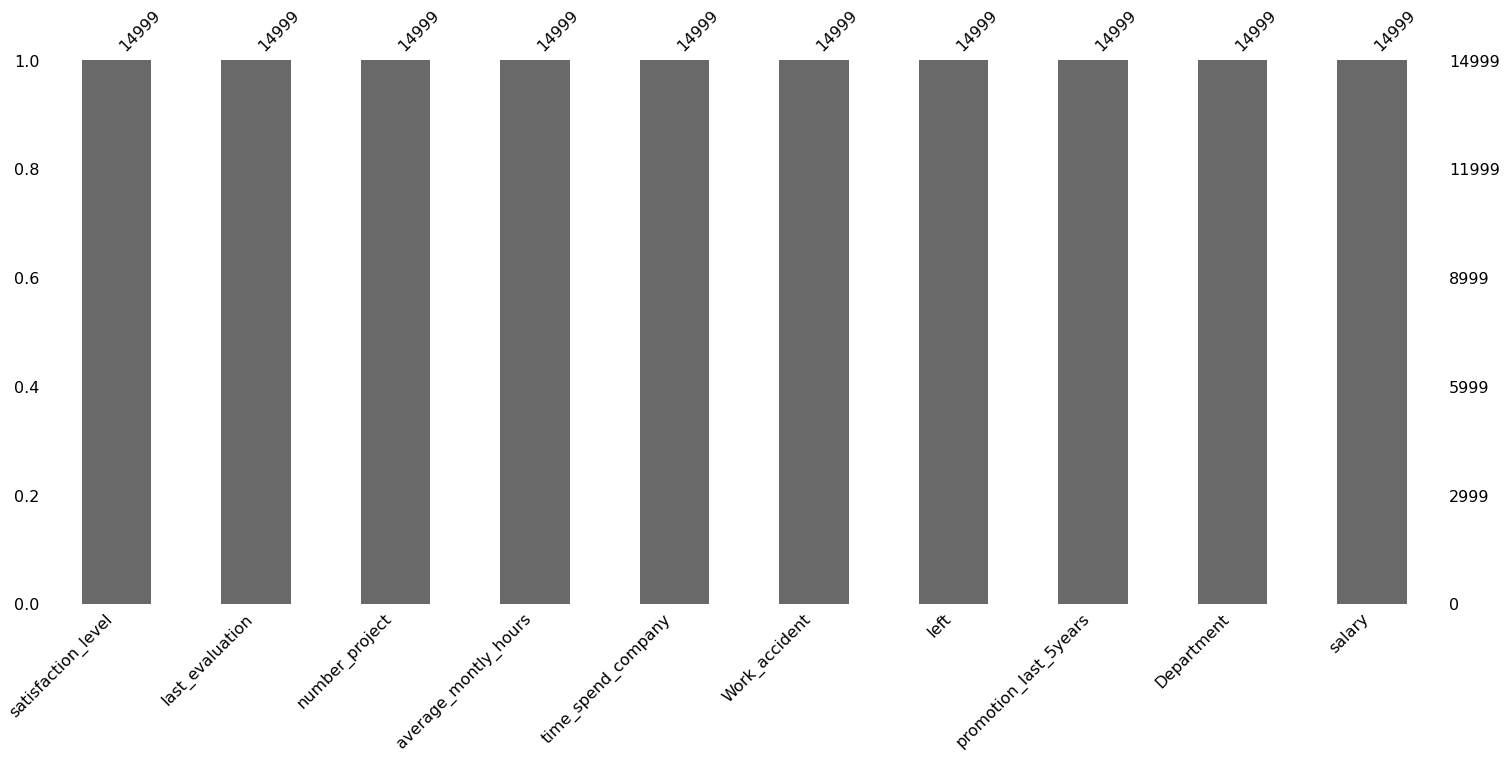

In [11]:
import missingno as msno

msno.bar(df)
plt.show()

In [12]:
df.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [13]:
df.Department.value_counts(normalize=True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: Department, dtype: float64

In [14]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [15]:
df.salary.value_counts(normalize=True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

In [16]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [17]:
df.left.value_counts(normalize=True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [18]:
df.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [19]:
df.groupby("left").var()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.047134,0.026246,0.960172,2086.911926,2.440931,0.144393,0.025564
1,0.069661,0.039075,3.305725,3745.785838,0.955893,0.045099,0.005294


In [20]:
df.groupby("left").std()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
1,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759


In [21]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Data Visualization

In [22]:
def plot_column(var):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    sns.histplot(x=df[var], ax=axes[0][0], kde=True)
    qqplot(df[var], dist="norm", ax=axes[0][1])
    sns.boxplot(x=df.left, y=df[var], ax=axes[1][0], palette="tab10")
    sns.barplot(x=df.left, y=df[var], ax=axes[1][1], palette="tab10")
    plt.suptitle(var.title())
    plt.show()

In [23]:
df["left"] = df.left.map({0: "Stayed", 1: "left"})

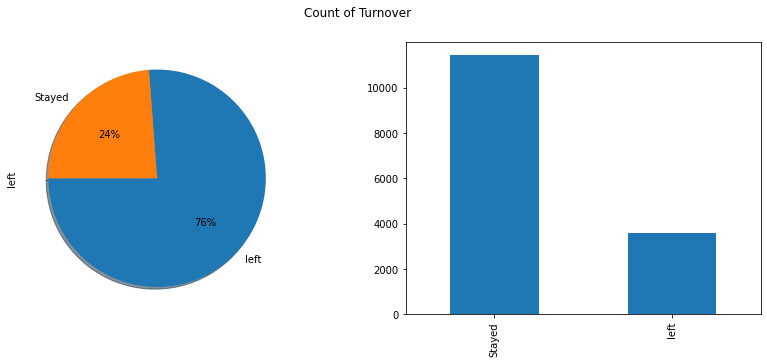

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
df.left.value_counts().plot.pie(
    autopct="%.0f%%", labels=df.left.unique(), shadow=True, startangle=180, ax=ax[0]
)


df.left.value_counts().plot.bar()
fig.suptitle("Count of Turnover")
plt.show()

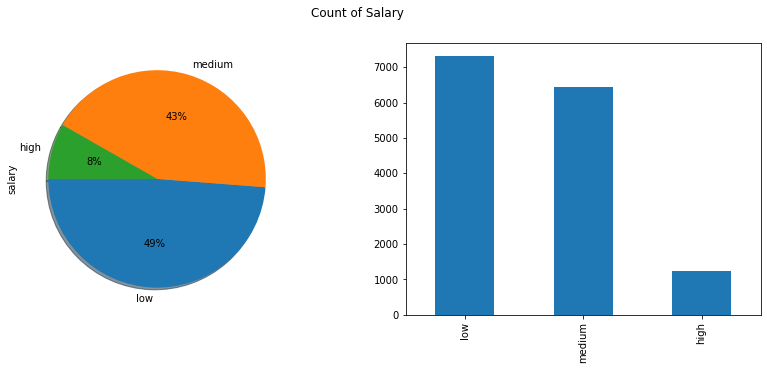

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
df.salary.value_counts().plot.pie(
    autopct="%.0f%%", labels=df.salary.unique(), shadow=True, startangle=180, ax=ax[0]
)


df.salary.value_counts().plot.bar()
fig.suptitle("Count of Salary")
plt.show()

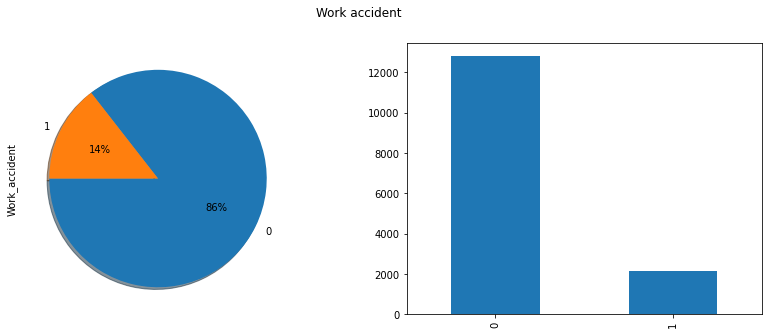

In [26]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
df.Work_accident.value_counts().plot.pie(
    autopct="%.0f%%",
    labels=df.Work_accident.unique(),
    shadow=True,
    startangle=180,
    ax=ax[0],
)


df.Work_accident.value_counts().plot.bar()
fig.suptitle("Work accident")
plt.show()

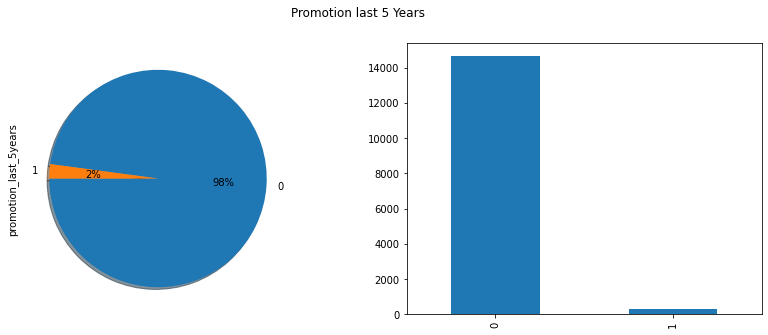

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
df.promotion_last_5years.value_counts().plot.pie(
    autopct="%.0f%%",
    labels=df.promotion_last_5years.unique(),
    shadow=True,
    startangle=180,
    ax=ax[0],
)


df.promotion_last_5years.value_counts().plot.bar()
fig.suptitle("Promotion last 5 Years")
plt.show()

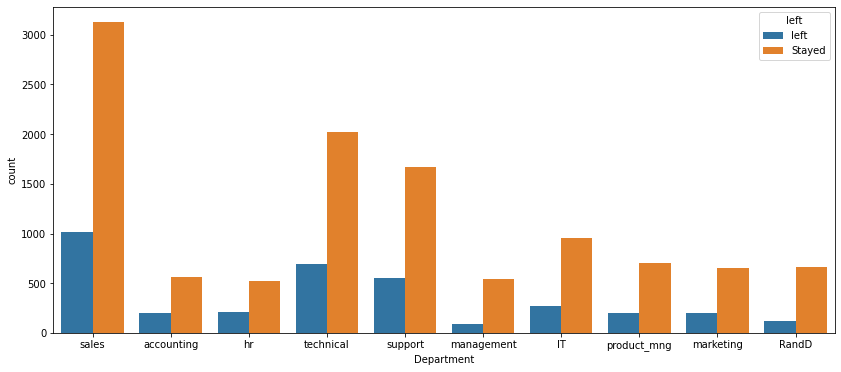

In [28]:
plt.figure(figsize=(14, 6))
sns.countplot(df["Department"], hue=df["left"], data=df)
plt.show()

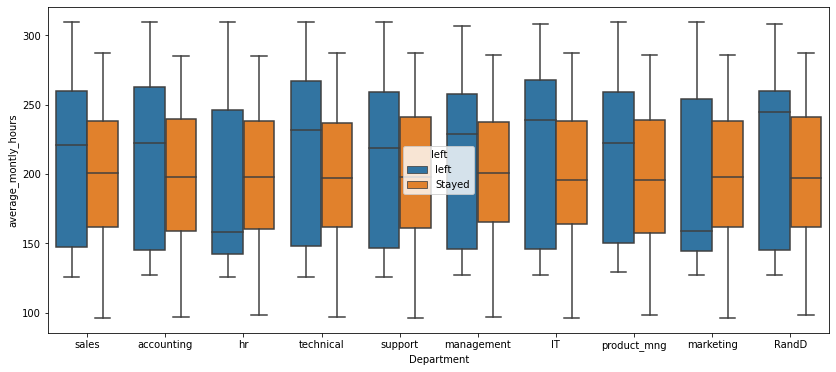

In [29]:
plt.figure(figsize=(14, 6))
sns.boxplot(y="average_montly_hours", x="Department", hue="left", data=df)
plt.show()

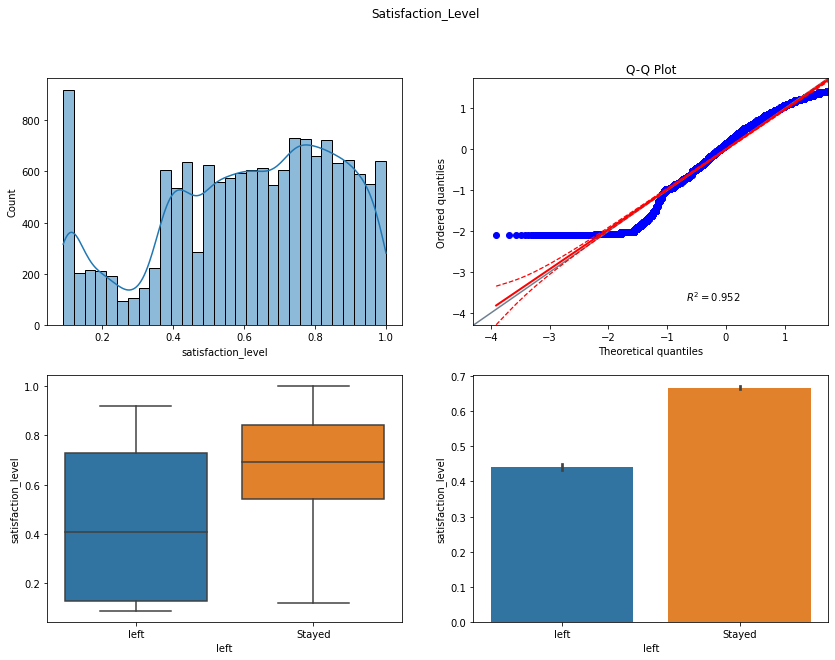

In [30]:
plot_column("satisfaction_level")

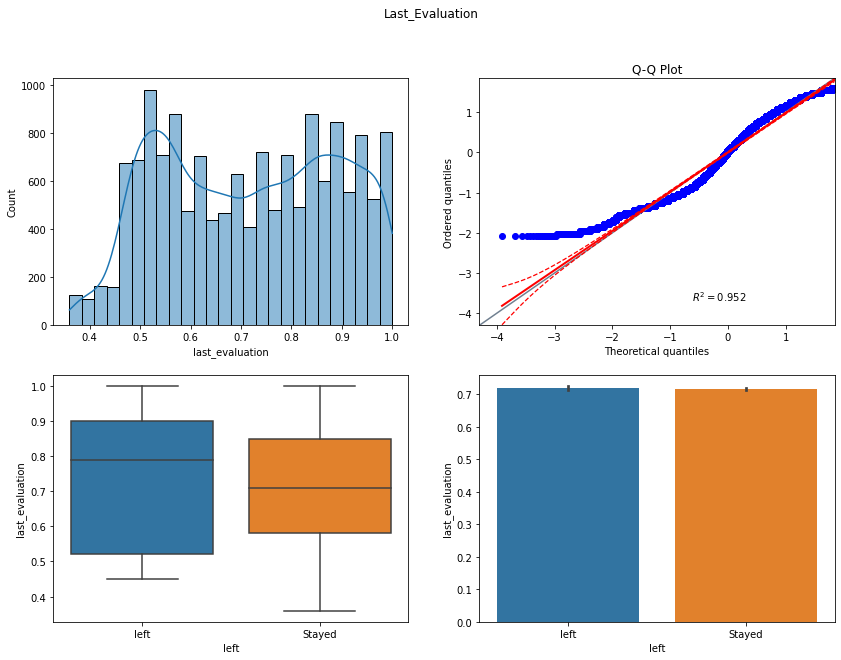

In [31]:
plot_column("last_evaluation")

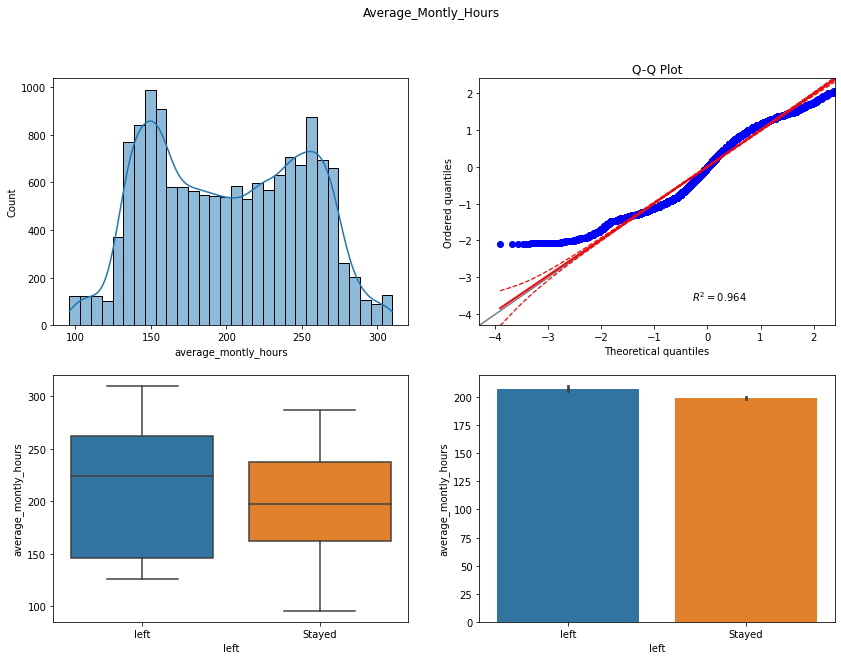

In [32]:
plot_column("average_montly_hours")

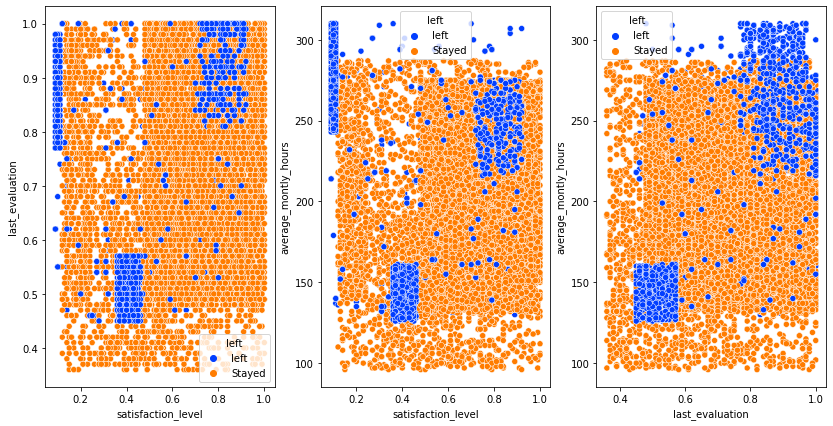

In [33]:
fig, ax = plt.subplots(ncols=3, figsize=(14, 7))
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="last_evaluation",
    hue="left",
    ax=ax[0],
    palette="bright",
)
sns.scatterplot(
    data=df,
    x="satisfaction_level",
    y="average_montly_hours",
    hue="left",
    ax=ax[1],
    palette="bright",
)
sns.scatterplot(
    data=df,
    x="last_evaluation",
    y="average_montly_hours",
    hue="left",
    ax=ax[2],
    palette="bright",
)
plt.show()

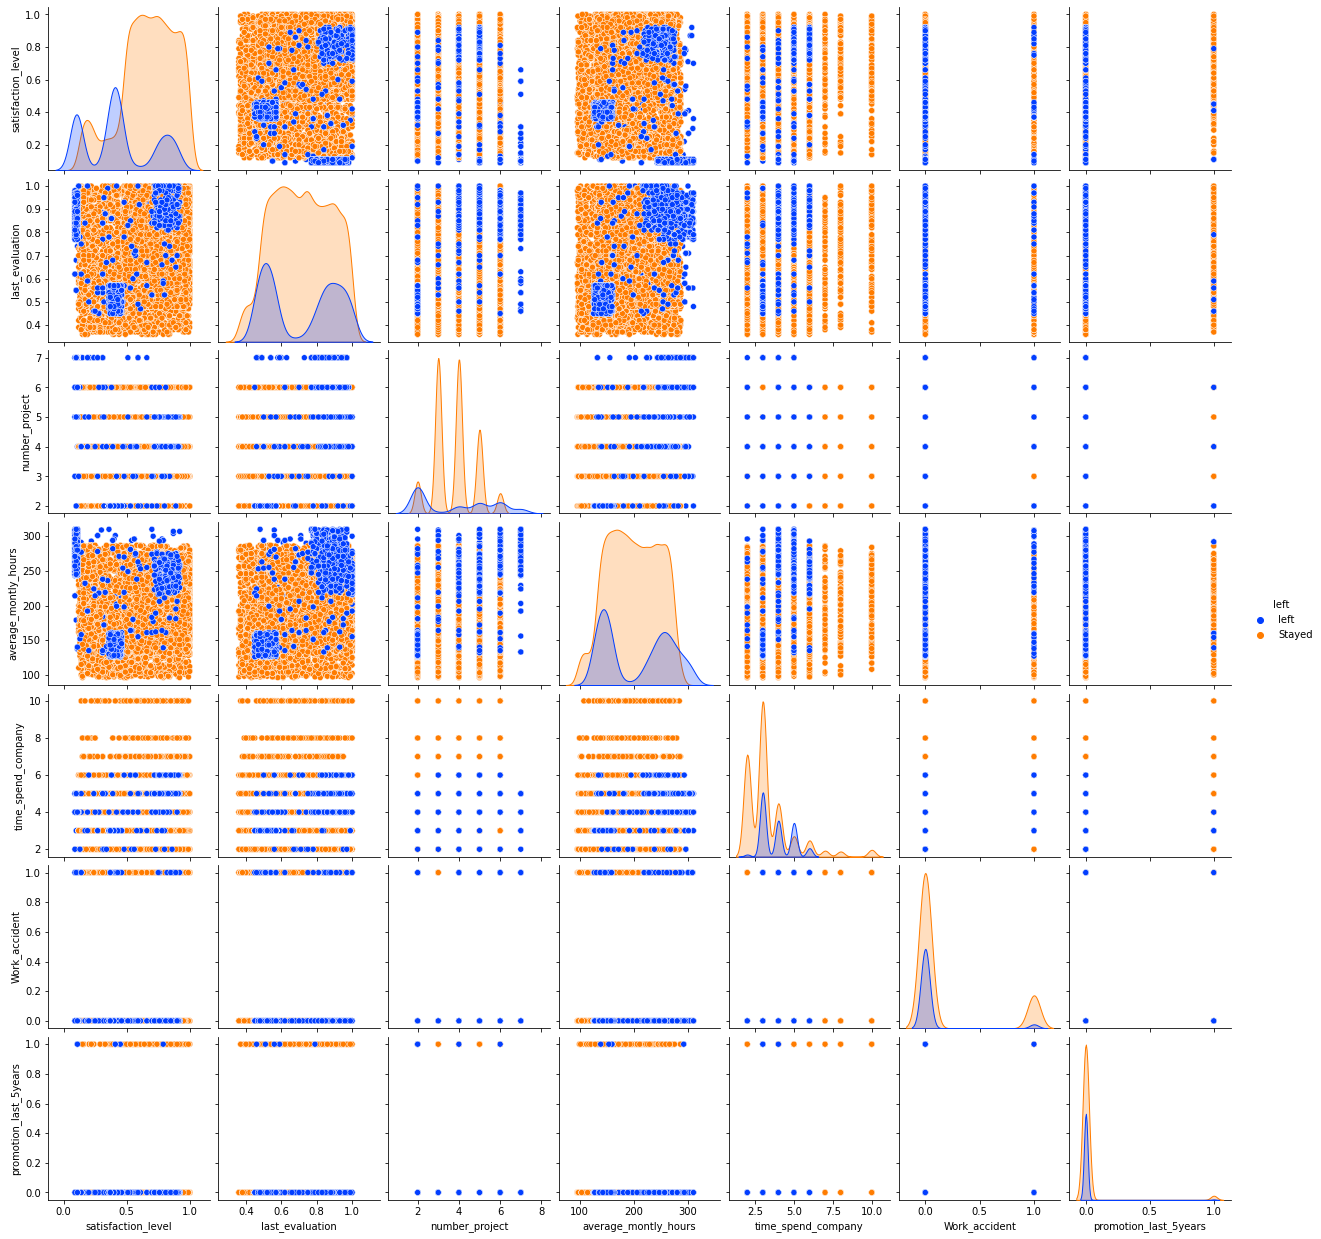

In [34]:
sns.pairplot(df, hue="left", palette="bright")
plt.show()

### Data Preprocessing

In [35]:
from yellowbrick.target import (
    FeatureCorrelation,
    BalancedBinningReference,
    ClassBalance,
)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [36]:
df["Department"] = label_encoder.fit_transform(df["Department"])
department_classes = label_encoder.classes_

df["salary"] = label_encoder.fit_transform(df["salary"])
salary_classes = label_encoder.classes_

classes = ["stayed", "left"]

In [37]:
df["Department"].unique()

array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1])

In [38]:
df["salary"].unique()

array([1, 2, 0])

In [39]:
department_classes

array(['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
       'product_mng', 'sales', 'support', 'technical'], dtype=object)

In [40]:
salary_classes

array(['high', 'low', 'medium'], dtype=object)

In [41]:
df["left"] = df.left.map({"Stayed": 0, "left": 1})

In [42]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [43]:
df.corrwith(df.left).sort_values()

satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
salary                  -0.001294
last_evaluation          0.006567
number_project           0.023787
Department               0.032105
average_montly_hours     0.071287
time_spend_company       0.144822
left                     1.000000
dtype: float64

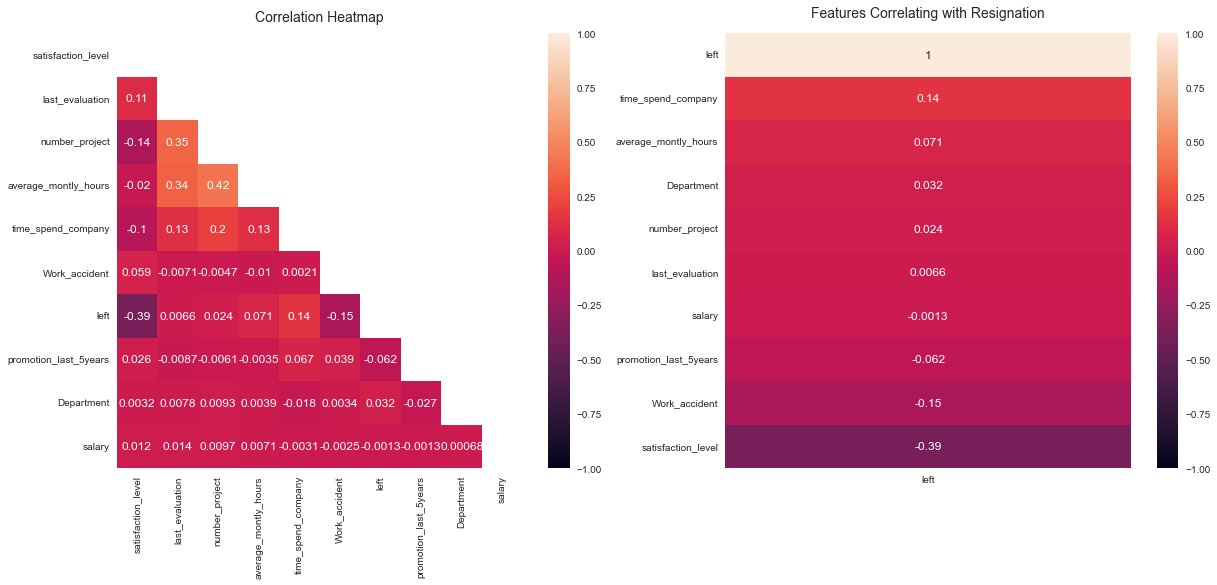

In [44]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8))
resign_corr = df.corr()
mask = np.triu(np.ones_like(resign_corr, dtype=np.bool))
cat_heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0])
cat_heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 14}, pad=12)

heatmap = sns.heatmap(
    resign_corr[["left"]].sort_values(by="left", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
)
heatmap.set_title(
    "Features Correlating with Resignation", fontdict={"fontsize": 14}, pad=16
);

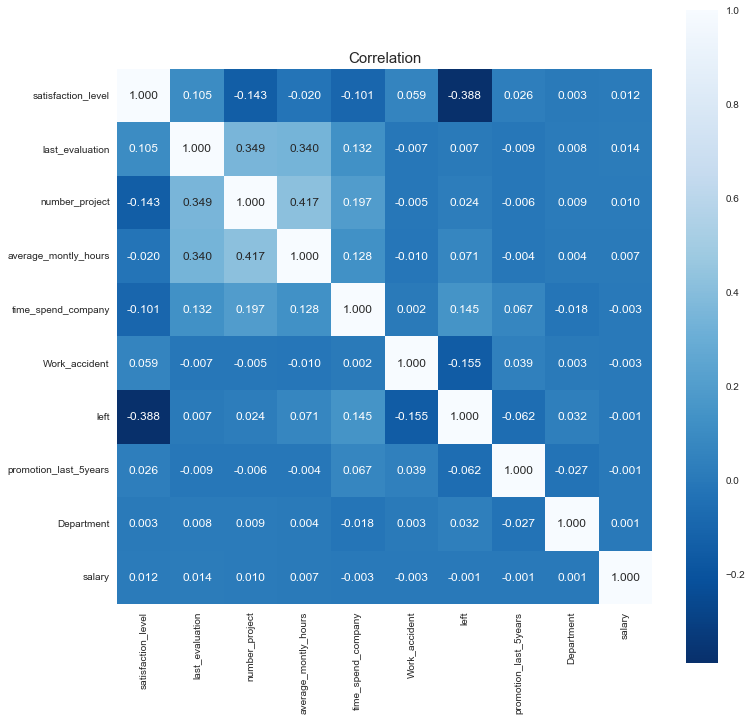

In [45]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, fmt=".3f", square=True, cmap="Blues_r")
plt.title("Correlation", size=15)
plt.show()

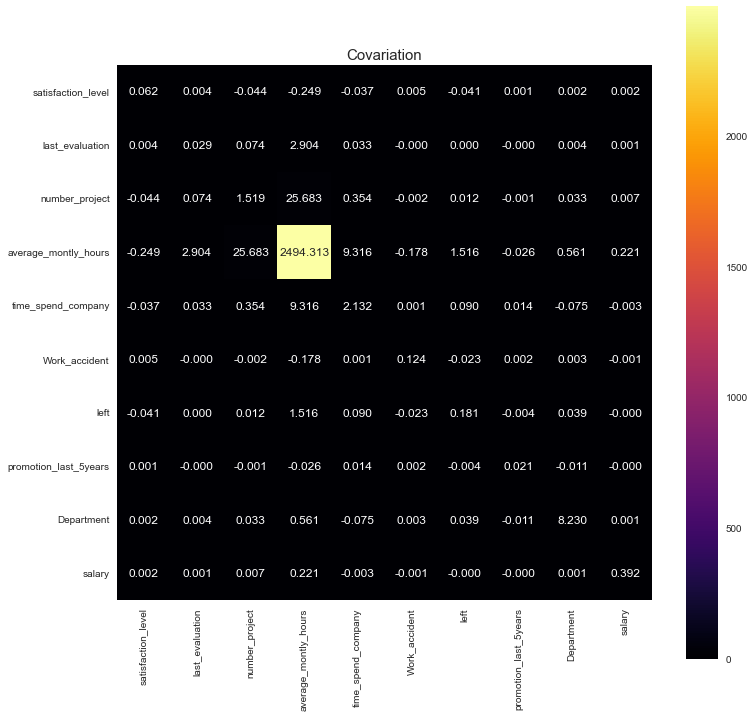

In [46]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.cov(), annot=True, fmt=".3f", square=True, cmap="inferno")
plt.title("Covariation", size=15)
plt.show()

### Dataset splitting

In [47]:
X = df.drop(["left"], axis=1)
y = df["left"]

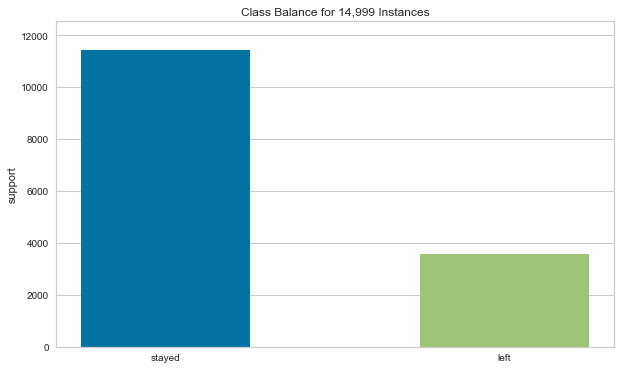

In [48]:
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes)
viz.fit(y)
viz.show()
plt.show()

#### Sampling Imbalanced Data

In [49]:
from imblearn import combine

sme = combine.SMOTEENN(random_state=14)
X, y = sme.fit_resample(X, y)

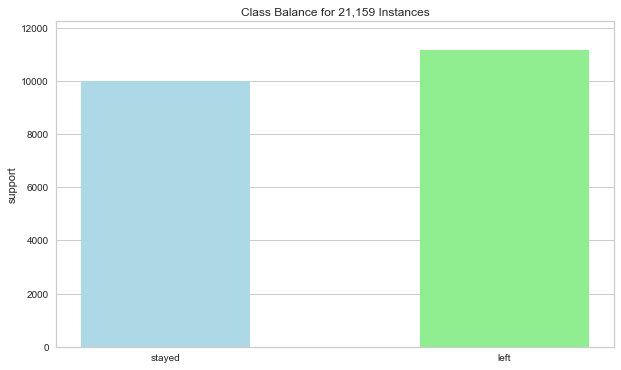

In [50]:
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes, colors=["lightblue", "lightgreen"])
viz.fit(y)
viz.show()
plt.show()

In [51]:
X[:5]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,0.58,0.74,4,215,3,0,0,7,1
1,0.82,0.67,2,202,3,0,0,7,1
2,0.45,0.69,5,193,3,0,0,7,1
3,0.78,0.82,5,247,3,0,0,7,1
4,0.49,0.60,3,214,2,0,0,7,1


In [52]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: left, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

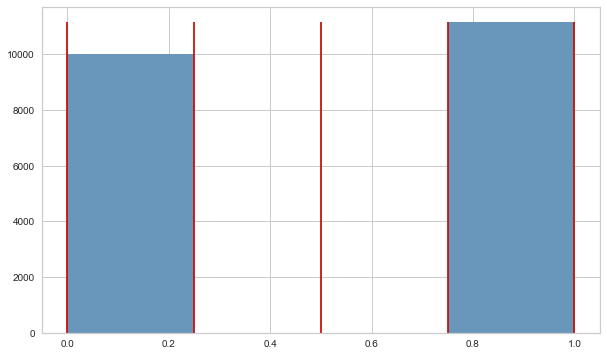

In [54]:
plt.figure(figsize=(10, 6))
visualizer = BalancedBinningReference()
visualizer.fit(y)
plt.show()

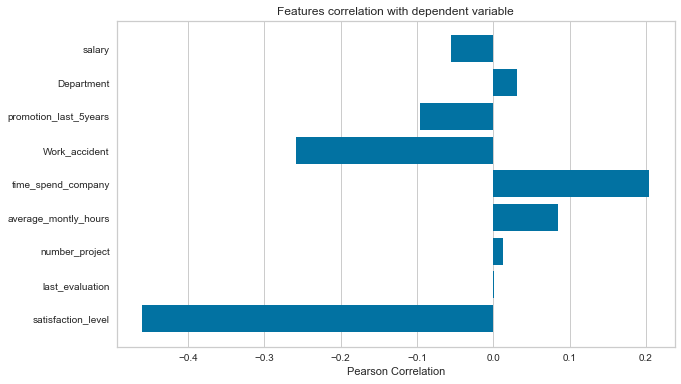

In [55]:
plt.figure(figsize=(10, 6))
visualizer = FeatureCorrelation(method="pearson")
visualizer.fit(X, y)
visualizer.show()
plt.show()

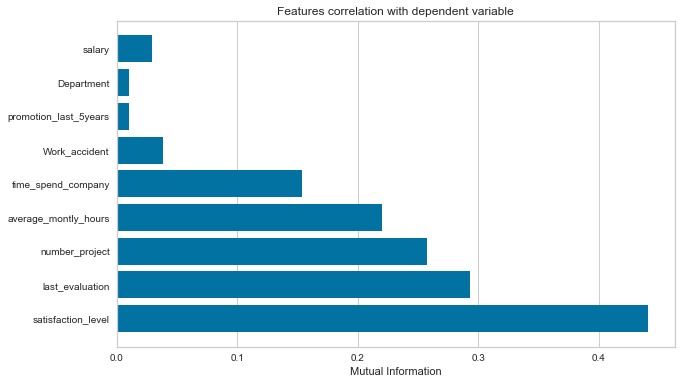

In [56]:
plt.figure(figsize=(10, 6))
visualizer = FeatureCorrelation(method="mutual_info-classification")
visualizer.fit(X, y)
visualizer.show()
plt.show()

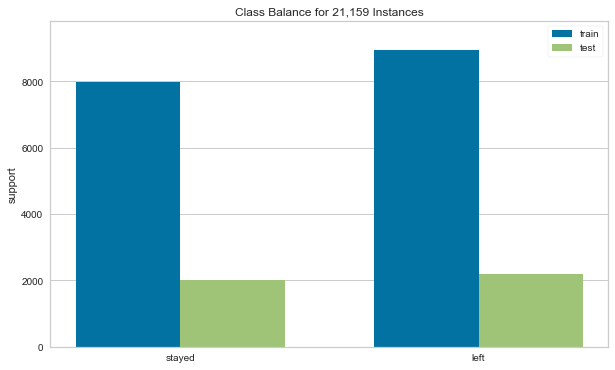

In [57]:
plt.figure(figsize=(10, 6))
viz = ClassBalance(labels=classes)
viz.fit(y_train, y_test)
viz.show()
plt.show()

### Logistic Regression

In [58]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.classifier import ClassPredictionError

In [59]:
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
lr = LogisticRegression(penalty="l2", solver="liblinear", random_state=45)
lr_clf = Pipeline([("standardize", scaler), ("log_reg", lr)])

In [60]:
lr_clf

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg',
                 LogisticRegression(random_state=45, solver='liblinear'))])

In [61]:
lr_clf.fit(X_train, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('log_reg',
                 LogisticRegression(random_state=45, solver='liblinear'))])

In [62]:
lr_clf.get_params(deep=False)

{'memory': None,
 'steps': [('standardize', StandardScaler()),
  ('log_reg', LogisticRegression(random_state=45, solver='liblinear'))],
 'verbose': False}

In [63]:
y_pred = lr_clf.predict(X_test)

**Classification Accuracy:**

In [64]:
print(accuracy_score(y_test, y_pred))

0.8024574669187146


**Classification Error:**

In [65]:
print(1 - accuracy_score(y_test, y_pred))

0.19754253308128544


**Sensitivity/True Positive Rate/Recall Score**

In [66]:
print(recall_score(y_test, y_pred))

0.8568840579710145


In [67]:
print(recall_score(y_test, y_pred, average=None))

[0.743083   0.85688406]


**Precision Score:**

In [68]:
print(precision_score(y_test, y_pred))

0.7844112769485904


In [69]:
print(precision_score(y_test, y_pred, average=None))

[0.82637363 0.78441128]


**F1 Score**

In [70]:
print(f1_score(y_test, y_pred))

0.819047619047619


In [71]:
print(f1_score(y_test, y_pred, average=None))

[0.78251821 0.81904762]


**Class Prediction Error**

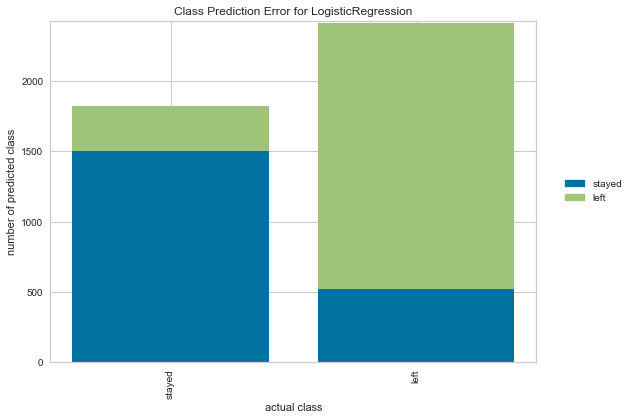

In [72]:
plt.figure(figsize=(10, 6))
visualizer = ClassPredictionError(lr_clf, classes=classes)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()
plt.show()

**ROC Curve**

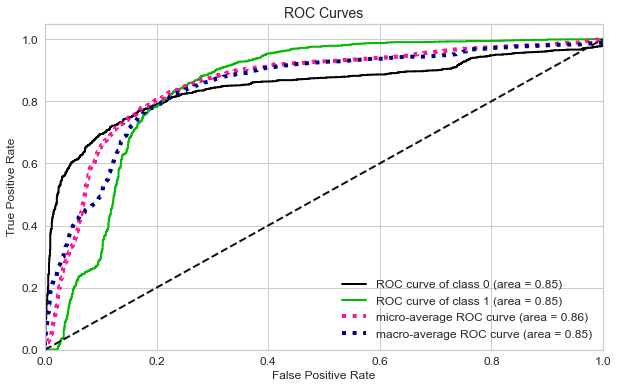

In [73]:
y_probas = lr_clf.predict_proba(X_test)
skplt.metrics.plot_roc(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Precision Recall Curve**

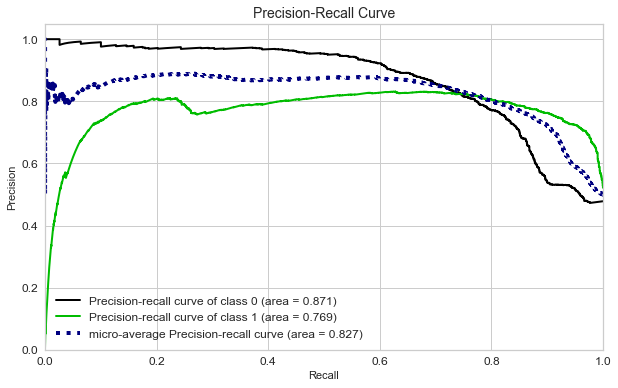

In [74]:
skplt.metrics.plot_precision_recall(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Learning Curve**

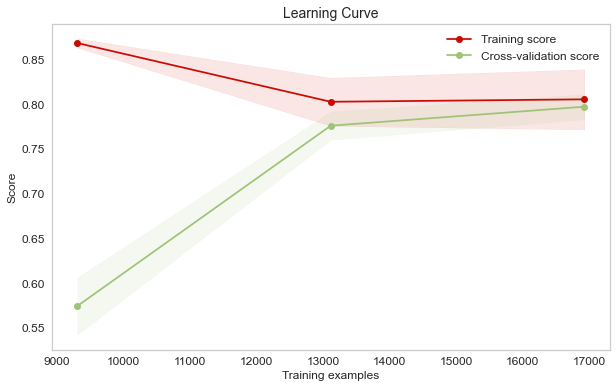

In [75]:
skplt.estimators.plot_learning_curve(
    lr_clf, X, y, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Lift Curve**

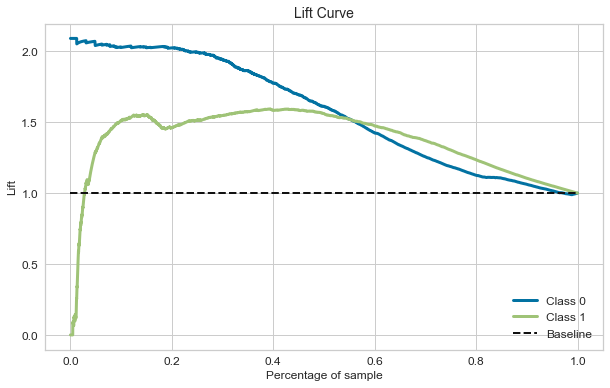

In [76]:
skplt.metrics.plot_lift_curve(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Cumulative Gains Curve**

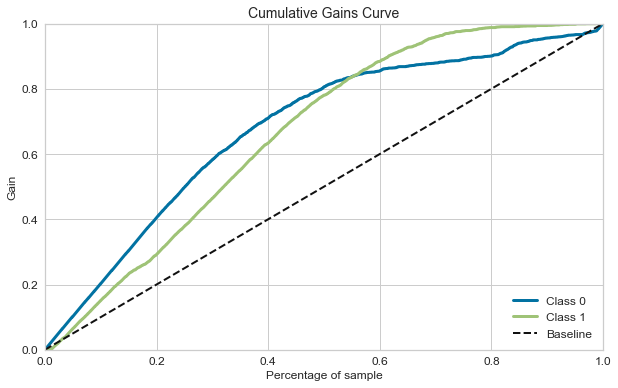

In [77]:
skplt.metrics.plot_cumulative_gain(
    y_test, y_probas, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Confusion Matrix**

In [78]:
confusion_matrix(y_test, y_pred)

array([[1504,  520],
       [ 316, 1892]], dtype=int64)

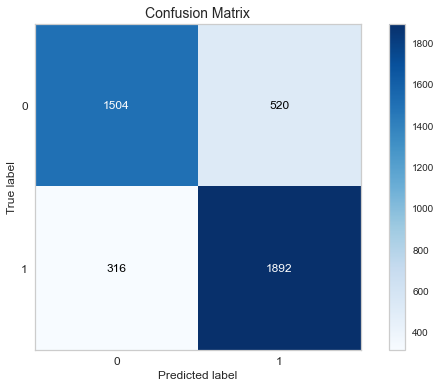

In [79]:
skplt.metrics.plot_confusion_matrix(
    y_test, y_pred, figsize=(10, 6), title_fontsize=14, text_fontsize=12
)
plt.show()

**Classification Report**

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      2024
           1       0.78      0.86      0.82      2208

    accuracy                           0.80      4232
   macro avg       0.81      0.80      0.80      4232
weighted avg       0.80      0.80      0.80      4232



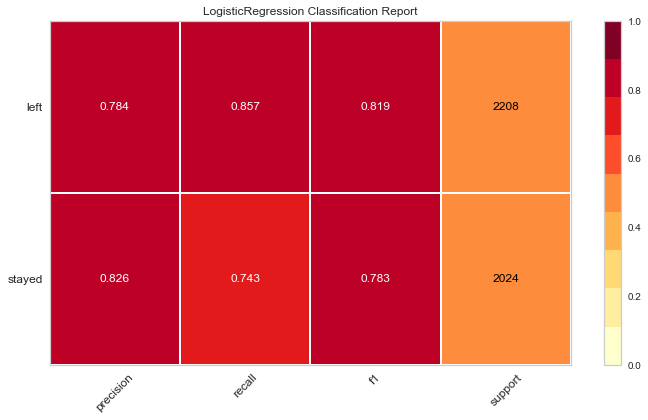

In [81]:
import yellowbrick as yb

plt.figure(figsize=(10, 6))
visualizer = yb.classifier.classification_report(
    lr_clf, X_train, y_train, X_test, y_test, classes=classes, support=True
)
visualizer.show()
plt.show()